# Moldy Gelatin

- Airborne spores produce tiny mold colonie on gelatin plates in a laboratory
- The many plates average 3 colonies per plate
- *What fraction of plates has exactly 3 colonies?*
    - *If the average is a large integer $m$, what fraction of plates has exactly $m$ colonies?*

_____

- At first, thinking about this problem, I was puzzled
    - We know that the expected number of colonies is 3, but the question is like one of those classic Binomial distribution problems (e.g. "What's the probability of rolling exactly one 6 in six rolls of a die?")
        - To calculate this, we need some value for $p$
            - But we can't make $p=3$ since that wouldn't make sense
            
- The key idea is to split the plate into sections
    - This eventually leads to using the Poisson distribution to solve for our answer

- If we divide our plate into 4 sections, we can treat each section having a colony as a Bernoulli trial
    - Since the expected number of colonies on a single plate is equal to 3, the probability of any of the four sections having a colony is equal to 3/4
        - So, following this logic, the probability of having exactly 3 colonies is equal to:
        
$$
P(\text{3 colonies}) = \binom{4}{3}(3/4)^{3}(1/4)^{1} = 4\cdot\frac{3^{3}}{4^{4}} = \left (\frac{3}{4}\right )^{3} = 0.421875
$$

- But this can't be the complete answer
    - For one thing, modeling each section of the plate as a Bernoulli trial assume the area can only have 0 or 1 colony per section
        - So, under this model, the plate can only have 0, 1, 2, 3, or 4 colonies
            - We know that it's not super likely, but we should be able to have way more colonies (maybe even infinitely many)
                - This idea will lead to us eventually using the Poisson distribution (described later)

- As a test, let's try dividing the plate into 100 evenly sized sections
    - Here, for our Binomial distribution, $p=3/100$ so:
    
$$
P(\text{3 colonies}) = \binom{100}{3}\cdot0.03^{3}\cdot0.97^{97}
$$
- We won't calculate this by hand

In [2]:
from scipy.stats import binom

In [3]:
binom.pmf(3, 100, 0.03)

0.2274741274821556

$$
\implies P(\text{3 colonies}) \approx 0.2275
$$

- Let's plot these probabilities for increasing $n$ to see what it converges to

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

In [8]:
array_n = np.arange(4, 1000)
list_P = []

for n in array_n:
    p = 3/n
    P = binom.pmf(3, n, p)
    list_P.append(P)

Text(0,0.5,'Probability')

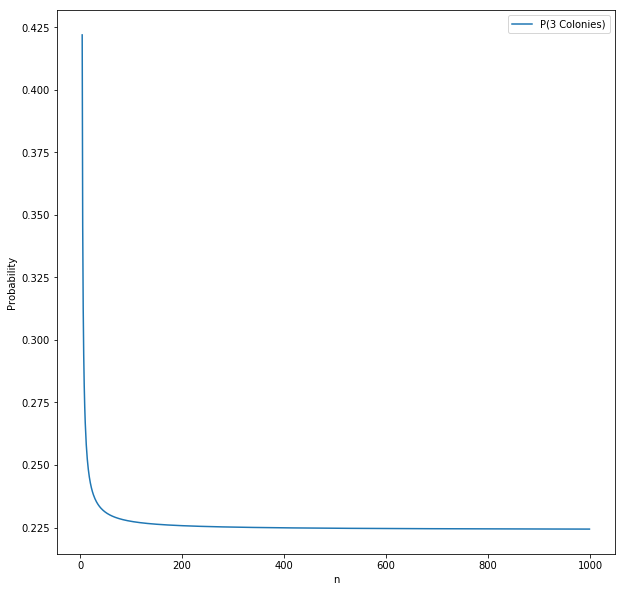

In [11]:
plt.plot(array_n, list_P, label = 'P(3 Colonies)')
plt.legend()
plt.xlabel('n')
plt.ylabel('Probability')

- As we can see, the probability converges pretty quickly to a value around 0.225

- Now, we introduce the Poisson distribution
    - Consider a situation where we're using the Binomial distribution, but:
        1. $p$ is very small
        2. $n$ is very big
        
- In this scenario, the $\binom{n}{k}$ value will be massive, and the $p^{k}$ value will be tiny
    - We can simplify this calcuation by approximating it using the Poisson distribution
    
$$
P(\text{3 colonies}) = \frac{\lambda^{k}e^{-\lambda}}{k!}
$$

- Here, $\lambda$ is the expected number of colonies i.e. $\lambda = 3$
    - **Note**: $p$ gives us a probability where $\lambda$ gives us an expected value
        - So $p=1/\lambda$

- So, using the Poisson distribution for our calculation:

$$
P(\text{3 colonies}) = \frac{3^{3}e^{-3}}{3!} \approx 0.224042
$$

- And this value fits in perfectly with our plot above!

- Now, expanding this solution where $m$ is very large, we can just replace the $lambda = 3$ with $\lambda = m$